# TFSD et TFD


## Exercice I

### 1) TFSD 
Retrouvez la formule de la TFSD (qui va du discret vers le continu périodique) et appliquez-la pour le signal "impulsion unité", noté $\delta[k]$, et qui joue le même rôle que l'impulsion de Dirac, notée $\delta$ et par abus parfois $\delta(t)$, en continu. Dans le cas où l'on a un signal électrique, en Volts et d'échantillons en fonctions du temps, donnez l'unité de la TFSD de :
   - $\delta[k]$
   - $\delta_l[k]=\delta[k-l]$ avec $l\in\mathbb{N}$ représentant un retard de $l$ échantillons.

**Vérifications manuelles** 
 - Vérifiez bien que les arguments des exponentielles sont sans dimention, que l'on obtient bien une fonction $\mathbb{R}\mapsto\mathbb{C}$, utilisez les [] pour ce qui est discret et () pour le continu ;
 - que la formule prise avec $l=0$ correspond au premier signal 
 - prenez les equivalents en temps continus ($\delta$ et $\delta_l$ de Dirac) et utilisez la transformée de Laplace associée au théorème du retard.
 - Le signal est réel vérifiez que l'on a bien un spectre de Hilbert (réel pair et imaginaire impair)

**Vérification assitée par Ordinateur**

On va représenter l'espace des fréquences continu avec une résolution très fine $0.01 Hz$ comparé à la fréquence d'échantillonnage $F_e=1$ arbitraire. Les sommes peuvent être faites par une boucle |for| mais on peut utiliser le calcul matriciel et faire un véritable produit scalaire puisque c'en est un $c(f).

Analysez et nommez les axes des figures (xlabel, ylabel) en donnant les unités.



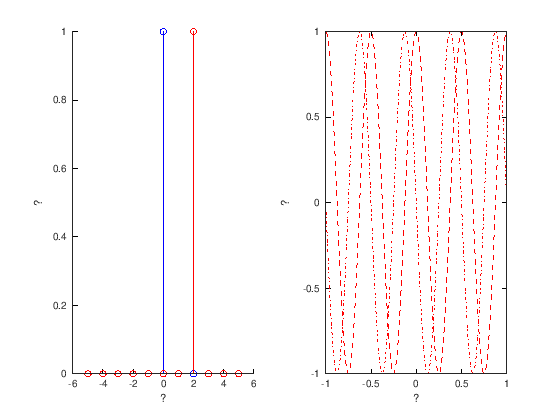

In [44]:
clear all; close all;
Fe=1; Te = 1/Fe; k=-5:5;
Fc=1000; Tc = 1/Fc; t=k*Te/Fc;

delta = @(k) k==0 ; % impulsion unité discrète (astuce vaut 1 quand vrai)
dirac = @(t) (t==0)/Tc ; % Dirac de poids 1 !! poids = A *Tc* donc amplitude =1/Tc !! 

x1 = delta(k);
l=2;xl = delta(k-l);

%% TFSD 
W= @(f,k) exp(i*2*pi*f*k*Te) ; % Onde d'analyse 
tfsd = @(s,f) sum(s .* conj(W(f,k))); % tfd en un point par p.s.
Vf=-1:0.01:1;
for n=1:length(Vf)
    f=Vf(n);
    tfsd_x1(n) = tfsd(x1,f);
    tfsd_xl(n) = tfsd(xl,f);
end


%% on affiche le temporel
subplot(121);
stem(k,x1,'bo'); hold on;
stem(k,xl,'ro');
xlabel("?");
ylabel("?");

%% et le fréquentiel
subplot(122);
plot(Vf,tfsd_x1,'b-.');
plot(Vf,real(tfsd_xl),'r--');hold on;
plot(Vf,imag(tfsd_xl),'r-.');
xlabel("?");
ylabel("?");

### 2) TFD
De même, retrouvez la formule de la TFD (discret périodique vers discret périodique), et donnez la TFD des deux signaux précédents. Vous avez besoin pour cela d'un *nombre de points N = 4* $\iff$ *fenêtre d'observation/période temporelle* $\iff$ *fenêtre d'obervation/période fréquentielle*.
Vous représenterez le signal temporel et son dual fréquentiel sur plusieurs de leur périodes, que vous indiquerez.
On prendra l'habitude d'utiliser un indice k pour le temps et n pour les fréquences.

**Vérifications manuelles**

 * idem fonction de $\mathbb{Z}_N\rightarrow \mathbb{Z}_N$ (tout est suite numérique périodique), dimention des arguments de l'exponentielle, unités en [V]
 * la TFD est un échantillonnage **fréquentiel** de résolution $\Delta_f=\frac{F_e}{N}$
 * on peut aussi utiliser la transformation de Laplace que l'on vient échantillonner en temps $t=k\,T_e$ et en fréquence $p=i\,2\pi\,\Delta_f\,n$.

**Vérification octave**

L'algo efficace de TFD, nommé FFT, est implémenté par la fonction fft et la réciproque ifft.
Analysez et nommez les axes en donnant les unitées (xlabel("..."), ylabel) 

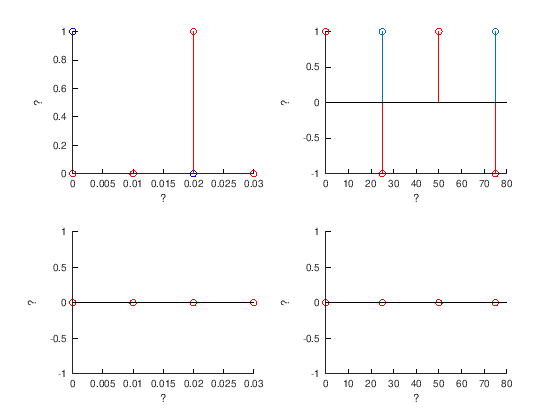

In [46]:
N=4;
Fe=100; Te = 1/Fe; k=(1:N)-1; t=k*Te;
Df=Fe/N ; n=k; f = n*Df;
delta = @(k) k==0 ; % impulsion unité discrète (astuce vaut 1 quand vrai)
dirac = @(t) (t==0)/Tc ; % Dirac de poids 1 !! poids = A *Tc* donc amplitude =1/Tc !! 

x1 = delta(k);
l=2;xl = delta(k-l);

subplot(221)
stem(t,real(x1),'b');hold on;
stem(t,real(xl),'r')
xlabel("?");
ylabel("?");
subplot(222)
stem(f,real(fft(x1)));hold on;
stem(f,real(fft(xl)),'r')
xlabel("?");
ylabel("?");
subplot(223)
stem(t,imag(x1));hold on;
stem(t,imag(xl),'r')
xlabel("?");
ylabel("?");
subplot(224)
stem(f,imag(fft(x1)));hold on;
stem(f,imag(fft(xl)),'r');
xlabel("?");
ylabel("?");

### 3) TFD en matriciel, changement de base

Gardons l'exemple avec des suites de l'espace $E=\mathbb{Z}_N\rightarrow \mathbb{C}$ (suite numérique complexes de période N/longueur N).

 - Utilisez les impulsions unitaires $x_l$ pour construire la base canonique $B_c$ de $E$ et donnez les coordonnées de $x_1$ et de la suite $(1,2,3,4,1,2,3,4,\ldots)$ (la réponse est évidente !)

La TFD est une application linéaire de E dans E, et l'on souhaite écrire la matrice de cette application $T=mat{(TFD,B_c,B_w)}$. Les vecteurs d'analyses $t\mapsto e^{i\,2\pi\,f\,t}$ deviennent les vecteurs suites $w_n=k\mapsto e^{i\,\frac{2\pi}{N}k\,n}=W_N^{nk}$ avec $W_N = e^{i\,\frac{2\pi}{N}}$ la racine Nième de l'unité. Les vecteurs $w_n$ de la base fréquentielle $B_w$ sont donc des suites géométriques sur 4 points.
  - représentez les vecteurs $w_0$ à $w_3$ de la base $B_c$ sous forme de suites, et représentez-les aussi en valeurs $w_n[k]$ sur le cercle unité.
  - un point de la TFD d'un signal s est alors calculé par $\hat{S}[n] = <\!<s,w_n>\!>_p = {}^T\!s_{B_c} . \overline{w_n}_{B_c} =  {}^T\!\overline{w_n}_{B_c}.s_{B_c}  $ comme un produit scalaire matriciel.
  - donnez alors la matrice de l'application linéaire TFD en 4 points et calculez la TFD de $x_{B_c}=(1,-1,1,-1)_{B_c}$ sous forme d'un produit matriciel $M.x_{B_c}$
  
**verifications manuelles**
 - la base est orthogonale et les vecteurs de la base sont de norme $\sqrt {N}$ on doit donc avoir $M^H.M=N.Id$ (l'inverse d'une matrice orthogonale est sa transposée pour les matrices réelles ; comme il s'agit d'application complexes, on remplace la transposée par la *transconjuguée* ou *adjointe* notée $M^H={}^T\!\overline{M}$)
 - le signal $x$ est en fait la TFD de $\delta[k-2]$ précédente. On peut calculer la transformée inverse et voir que l'on obtient bien le primal $\delta[k-2]$. Pour calculer la transformée inverse, on peut retourner le signal $x[n]$ en $x[-n]$ (soit inverser l'ordre des valeurs de la suite) et calculer sa transformée (en matriciel). Comme les vecteurs ne sont pas normés il faut diviser par N, car $M^H.M=N.Id$ indique bient que transformer et appliquer la transofrmée inverse multipli par N.

## Exercice II
On rappelle l'équation de la transformée de Fourier des signaux discrets (TFSD) :

$X(f)=\sum\limits_{n=-\infty}^{+\infty}x[n]\,e^{-i\,2\pi\,n\frac{f}{F_e}}$

où $F_e$ est la fréquence d'échantillonnage.


Soit d'autre part le signal : $e[n] = \delta[n-1] + 2.\delta[n]+ \delta[n+1]$.

   - 1 Représenter e[n].

   - 2 Calculer E(f), TFSD de e[n]. Tracer $|E(f)|$ dans l'intervalle ± Fe.

On rappelle l'équation de la transformée de Fourier discrète (TFD) à N points :

$X[k.\Delta f ] = \sum\limits_n x[n].e^{i 2 \pi\,\frac{n}{N}k}$

avec k entier, $\Delta_f = \frac{Fe}{N}$.

   - 3°) Calculer $E[k\Delta_f]$, TFD à 3 points de e[n]. Tracer $E[k\Delta_f]$ dans l'intervalle ± Fe.

   - 4°) Calculer $E[k\Delta_f]$, TFD à 5 points de e[n]. Tracer $E[k\Delta_f]$ dans l'intervalle ± Fe.

   - 5°) On fait maintenant passer le signal $e[nT_e]$, avec Te = 1/Fe, par un élévateur de fréquence
d'échantillonnage (EFE), de rapport d'élévation R = 2. Soit y[nTe'] le signal de sortie de
l'EFE. Tracer y[n]. Calculer Y(f), TFSD de y[nTe'], en fonction de f et de Fe .

   - 6°) En quelques phrases claires et brèves, conclure sur l'ensemble de ce travail.

   N.B : sur chacun des tracés des questions 3 et 4, on superposera la courbe de la question 2.


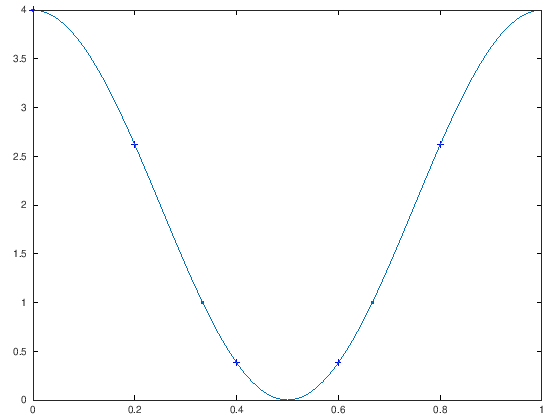

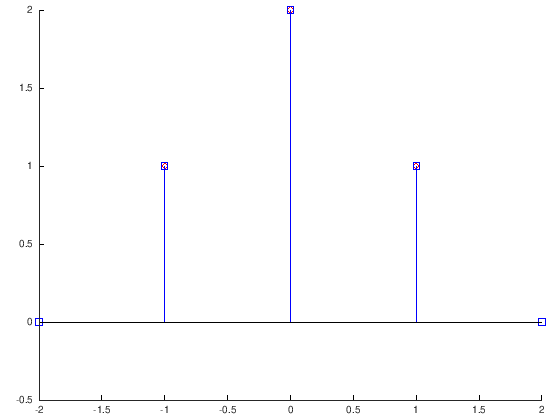

In [2]:
e = @(n) delta(n-1) + 2*delta(n) + delta(n+1) ;

figure(2)
TE= @(f) 2+2*cos(2*pi*f);
k3=0:2;
k5=0:4;
plot(k3 /3,TE(k3/3),'r.'); hold on;
plot(k5 /5,TE(k5/5),'b+'); hold on;
f=0:0.01:1;
plot(f,TE(f));

figure(3);
stem(k3-1,fftshift(ifft(TE(k3/3))),'rd');
hold on;
stem(k5-2,fftshift(ifft(TE(k5/5))),'bs');



n =

  -2  -1   0   1   2

y =

   1   0   2   0   1



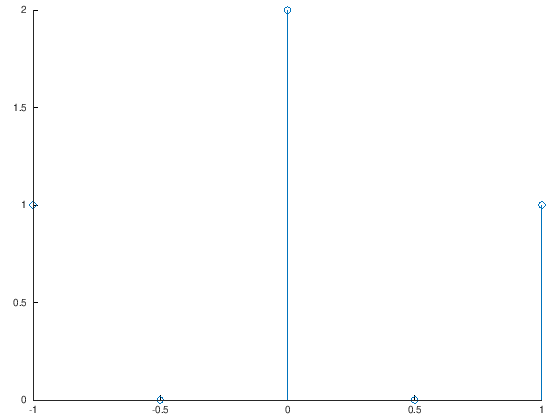

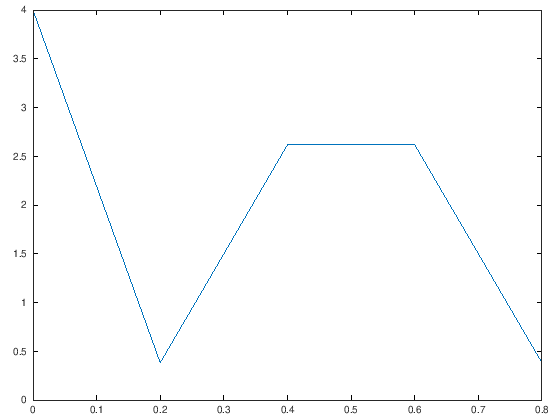

In [3]:
n=-2:2
y=e(n/2)
stem(n/2,y)

figure
plot((n+2)/5,abs(fft(y)))

## Exercice III
Un signal analogique x, purement sinusoïdal de fréquence F = 60 Hz, est échantillonné
au rythme de 500 échantillons par seconde. Après conversion analogique-numérique, il est
analysé avec une FFT à 64 points.
On rappelle l’expression de la transformée de Fourier discrète à N points :

$X[k.\Delta f ] = \sum\limits_n x[n].e^{i 2 \pi\,\frac{n}{N}k}$

avec k entier, $\Delta_f = \frac{Fe}{N}$.

   - 1°) Quelle est la valeur de la fréquence Fe d’échantillonnage ?

   - 2°) Quelle est la valeur de la période Te d’échantillonnage ?

   - 3°) Quelle est la valeur de la période T du signal analogique ?

   - 4°) Quels sont les rangs (<=> valeurs de k) correspondant aux valeurs les plus élevées du
module de la FFT du signal analogique, pour un tracé de spectre où 0 ≤ k ≤ 64 ?

   - 5°) Quelle nouvelle fréquence Fe ’ d’échantillonnage éliminerait les problèmes associés au
fenêtrage (troncature temporelle) ? On proposera la valeur la plus proche de celle trouvée au